# Titanic - Hello world!

Este é o primeiro notebook de data science feito por mim!

@caiosainvallio

## Quadro geral

* __Objetivo:__ Prever a classe `Survived` (quem viveu e quem morreu);

* __Enquadramento:__ Aprendizado supervisionado;

* __Desempenho:__ Acurácia (definido pelo Kaggle).

## Pacotes utilizados

In [1]:
# Leitura e manipulação do dataset
import pandas as pd

# Plotar gráficos
import matplotlib.pyplot as plt
%matplotlib inline

## Obtenção dos dados

__Origem:__ [Kaggle Titanic](https://www.kaggle.com/c/titanic/data)

In [2]:
# Carregando os datasets
train = pd.read_csv('datasets/train.csv')
test = pd.read_csv('datasets/test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# Observar a estrutura dos datasets
train_raw = train.shape[0]
train_col = train.shape[1]
test_raw = test.shape[0]
test_col = test.shape[1]

print("Train dataset:\n", "---"*5, "\nLinhas:  {}\nColunas: {}".format(train_raw,train_col))
print("\nTest dataset:\n", "---"*5, "\nLinhas:  {}\nColunas: {}".format(test_raw,test_col))

Train dataset:
 --------------- 
Linhas:  891
Colunas: 12

Test dataset:
 --------------- 
Linhas:  418
Colunas: 11


Parece que o dataset de treino tem uma coluna a mais

In [6]:
display(train.columns)
display(test.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

No caso é a variável target `Survived`

Para realizar o pré processamento dos dados, é melhor juntar os dois datasets e realizar as manipulações, para depois dividir em treino e teste. Fazer o pré processamento com os datasets separados pode gerar viés.

In [7]:
# Salvar os índices dos datasets de treino e teste
train_index = train.shape[0]
test_index = test.shape[0]

# Salvar o PassengerId para a submissão no Kaggle
passengerId = test['PassengerId']

# Salvar o target dos dados de treino
target = train.Survived.copy()

# Retirar o target do treino
train.drop(['Survived'], axis=1, inplace=True)

# Agora que a estrutura do treino está igual ao teste, é só concatenar
df_completo = pd.concat(objs=[train, test], axis=0).reset_index(drop=True)

df_completo_raw = df_completo.shape[0]
df_completo_col = df_completo.shape[1]

print("df completo:\n", "---"*5, "\nLinhas:  {}\nColunas: {}".format(df_completo_raw,df_completo_col))


df completo:
 --------------- 
Linhas:  1309
Colunas: 11


## Exploracão dos dados

In [8]:
df_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


__Features:__

* `PassengerId`: Identificação do passageiro
* `Seurvived`: Passageiro sobreviveu
    - 0 = Não
    - 1 = Sim
* `Pclass`: Classe (casta social)
    - 1 = Primeira classe
    - 2 = Segunda classe
    - 3 = Tercera classe
* `Name`: Nome do passageiro
* `Sex`: Sexo do passageiro
* `Age`: Idade do passageiro
* `SibSp`: Número de cônjuges e irmãos no navio
* `Parch`: Número de pais e filhos no navio
* `Ticket`: Número de identificação da passagem
* `Fare`: Preço pago na passagem
* `Embarqued`: Por que o passageiro embarcou
    - C = Cherbourg
    - Q = Queenstown
    - S = Southampton

__Selecionando as features importantes__

Parece que as features `PassengerId`, `Name`, `Ticket` e `Cabin` não irão ajudar a prever alguma coisa.

In [9]:
# Excluindo as variéveis aparentemente não importantes para a predição
df_completo.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_completo.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


__Avaliando missings__

In [10]:
# Soma de valores missing
df_completo.isnull().sum()

Pclass        0
Sex           0
Age         263
SibSp         0
Parch         0
Fare          1
Embarked      2
dtype: int64

In [11]:
# Olhar a proporção de missing na variável Age
print(round( df_completo.Age.isnull().mean()*100,2), "%")

20.09 %


__Distribuição__

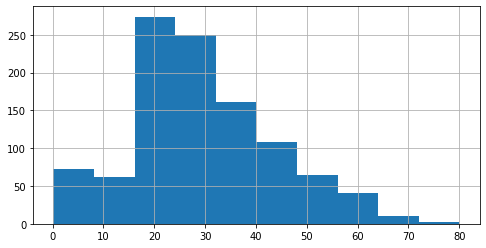

In [12]:
# Distribuição da variável Age
df_completo.Age.hist(figsize=(8,4))
plt.show()

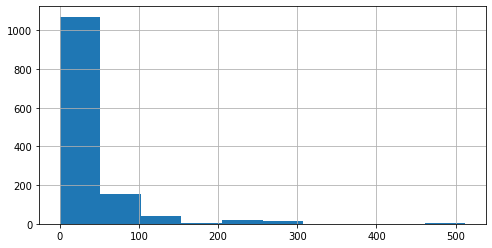

In [13]:
# Distribuição da variável Fare
df_completo.Fare.hist(figsize=(8,4))
plt.show()

In [14]:
# Variáveis de contagem
df_completo.SibSp.value_counts()

0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64

In [15]:
# Variáveis de contagem
df_completo.Parch.value_counts()

0    1002
1     170
2     113
3       8
5       6
4       6
9       2
6       2
Name: Parch, dtype: int64

In [16]:
# Variáveis de contagem
df_completo.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

__Observações:__

* `Pclass` mais de dois níveis -> Dummie
* `Sex` nominal categórico -> female = 1
* `Age` missing -> imputar mediana e criar coluna Age_na
* `SibSp` e `Parch` muito desbalanceadas -> binário 0 e 1 para >=1
* `Fare` missing -> imputar mediana
* `Embarked` missing -> Imputar moda
* `Embarked` mais de dois níveis -> Dummie

## Pré precessamento

__Age__

In [17]:
# Função de imputação de mediana e criação de variavel Age_na
def age_tramsform(df):
    '''
    Essa função cria uma nova coluna 'Age_na' com valores binários isna()=1.
    E Cria uma nova cluna 'Age_mediana' que imputa a mediana de Age nas 
    observações ausentes.
    '''
    df['Age_na'] = df.Age.isnull().astype('uint8')
    df['Age_mediana'] = df.Age.fillna(df.Age.median())

In [18]:
# Aplicar a funcão
age_tramsform(df_completo)
df_completo.drop(['Age'], axis=1, inplace=True)

In [19]:
# Observar o resultado
df_completo.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age_na,Age_mediana
0,3,male,1,0,7.2500,S,0,22.0
1,1,female,1,0,71.2833,C,0,38.0
2,3,female,0,0,7.9250,S,0,26.0
3,1,female,1,0,53.1000,S,0,35.0
4,3,male,0,0,8.0500,S,0,35.0


__Parch__

In [20]:
# Função de transformação da variável Parch
def parch_transform(variavel):
    
    ''''
    Essa função recategoriza classes:
    >=1 = 1
    <1 = 0
    '''
    
    if variavel >= 1:
        return 1
    else:
        return 0

In [21]:
# Criar uma nova coluna usando a função criada:
df_completo['Parch'] = df_completo['Parch'].map(parch_transform)

In [22]:
# Observar o resultado
df_completo.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age_na,Age_mediana
0,3,male,1,0,7.2500,S,0,22.0
1,1,female,1,0,71.2833,C,0,38.0
2,3,female,0,0,7.9250,S,0,26.0
3,1,female,1,0,53.1000,S,0,35.0
4,3,male,0,0,8.0500,S,0,35.0


__SibSp__

In [23]:
# Função de transformação da variável SibSp
def sibsp_transform(variavel):
    
    ''''
    Essa função recategoriza classes:
    >=1 = 1
    <1 = 0
    '''
    
    if variavel >= 1:
        return 1
    else:
        return 0

In [24]:
# Criar uma nova coluna usando a função criada:
df_completo['SibSp'] = df_completo['SibSp'].map(sibsp_transform)

In [25]:
# Observar o resultado
df_completo.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age_na,Age_mediana
0,3,male,1,0,7.2500,S,0,22.0
1,1,female,1,0,71.2833,C,0,38.0
2,3,female,0,0,7.9250,S,0,26.0
3,1,female,1,0,53.1000,S,0,35.0
4,3,male,0,0,8.0500,S,0,35.0


__Sex__

In [26]:
# Função de transformação da variável Sex
def sex_transform(variavel):
    
    ''''
    Essa função transforma a valores categóricos em numéricos, onde:
    female = 1
    male = 0
    '''
    
    if variavel == 'female':
        return 1
    else:
        return 0

In [27]:
# Criar uma nova coluna usando a função criada:
df_completo['female'] = df_completo['Sex'].map(sex_transform)
df_completo.drop(['Sex'], axis=1, inplace=True)

In [28]:
# Observar o resultado
df_completo.head()

,Pclass,SibSp,Parch,Fare,Embarked,Age_na,Age_mediana,female
0,3,1,0,7.2500,S,0,22.0,0
1,1,1,0,71.2833,C,0,38.0,1
2,3,0,0,7.9250,S,0,26.0,1
3,1,1,0,53.1000,S,0,35.0,1
4,3,0,0,8.0500,S,0,35.0,0


__Pclass__ & __Embarked__

In [29]:
# Transformar Pclass em categoria para realizar Dummie
df_completo['Pclass'] = df_completo['Pclass'].astype('category')

In [30]:
# Imputar a moda na variável Embarked
embarked_moda = df_completo['Embarked'].value_counts()[0]
df_completo['Embarked'].fillna(embarked_moda, inplace=True)

In [31]:
# Transformar variáveis categóricas em Dummie Variable
df_completo = pd.get_dummies(df_completo)

In [32]:
# Observar o resultado
df_completo.head()

,SibSp,Parch,Fare,Age_na,Age_mediana,female,Pclass_1,Pclass_2,Pclass_3,Embarked_914,Embarked_C,Embarked_Q,Embarked_S
0,1,0,7.2500,0,22.0,0,0,0,1,0,0,0,1
1,1,0,71.2833,0,38.0,1,1,0,0,0,1,0,0
2,0,0,7.9250,0,26.0,1,0,0,1,0,0,0,1
3,1,0,53.1000,0,35.0,1,1,0,0,0,0,0,1
4,0,0,8.0500,0,35.0,0,0,0,1,0,0,0,1


__Fare__

In [33]:
# Função de imputação de mediana 
def fare_tramsform(df):
    '''
    Essa funcão cria uma nova coluna 'Fare_mediana' que imputa a mediana de Fare nas 
    observações ausentes.
    '''
    df['Fare_mediana'] = df.Fare.fillna(df.Fare.median())    

In [34]:
# Aplicar a funcão
fare_tramsform(df_completo)
df_completo.drop(['Fare'], axis=1, inplace=True)

In [35]:
# Observar o resultado
df_completo.head()

,SibSp,Parch,Age_na,Age_mediana,female,Pclass_1,Pclass_2,Pclass_3,Embarked_914,Embarked_C,Embarked_Q,Embarked_S,Fare_mediana
0,1,0,0,22.0,0,0,0,1,0,0,0,1,7.2500
1,1,0,0,38.0,1,1,0,0,0,1,0,0,71.2833
2,0,0,0,26.0,1,0,0,1,0,0,0,1,7.9250
3,1,0,0,35.0,1,1,0,0,0,0,0,1,53.1000
4,0,0,0,35.0,0,0,0,1,0,0,0,1,8.0500


__Separar dados de treino e teste__

In [36]:
train = df_completo.iloc[:train_index]
test = df_completo.iloc[train_index:]

# Testando vários modelos

## 1. Regressão Logística

In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42, solver='liblinear', max_iter=100)
scores = cross_val_score(lr, train, target, cv=10)
%time
print("Mean: {:.5f}".format(scores.mean()))
print("Std:  {:.5f}".format(scores.std()))

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs
Mean: 0.79917
Std:  0.02146


## 2. Naive-Bayes

In [38]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
scores = cross_val_score(nb, train, target, cv=10)
%time
print("Mean: {:.5f}".format(scores.mean()))
print("Std:  {:.5f}".format(scores.std()))

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs
Mean: 0.70723
Std:  0.03963


## 3. Support Vector Machines

In [39]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
svc = SVC(random_state=42, gamma='auto')
scores = cross_val_score(svc, train, target, cv=10)
%time
print("Mean: {:.5f}".format(scores.mean()))
print("Std:  {:.5f}".format(scores.std()))

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 4.05 µs
Mean: 0.70742
Std:  0.06533


## 4. K-NN

In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
scores = cross_val_score(knc, train, target, cv=10)
%time
print("Mean: {:.5f}".format(scores.mean()))
print("Std:  {:.5f}".format(scores.std()))

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 4.05 µs
Mean: 0.69838
Std:  0.04997


## 5. Decision Tree

In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
scores = cross_val_score(dt, train, target, cv=10)
%time
print("Mean: {:.5f}".format(scores.mean()))
print("Std:  {:.5f}".format(scores.std()))

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 4.05 µs
Mean: 0.79242
Std:  0.02805


__Features importances__
Árvores de decisão tem o método `features_importances` que ajuda a entender melhor o modelo

In [42]:
dt.fit(train, target)
columns_ = train.columns
feature_importances = pd.DataFrame(dt.feature_importances_,index = columns_,columns=['importance']).sort_values('importance',ascending=False)
print(feature_importances)

              importance
female          0.309335
Fare_mediana    0.267125
Age_mediana     0.226499
Pclass_3        0.091763
Parch           0.028142
Pclass_1        0.027555
SibSp           0.012990
Embarked_C      0.012491
Age_na          0.012164
Embarked_S      0.011428
Embarked_Q      0.000508
Pclass_2        0.000000
Embarked_914    0.000000


## 6. Random Forest

In [43]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42, n_estimators=100)
scores = cross_val_score(rf, train, target, cv=10)
%time
print("Mean: {:.5f}".format(scores.mean()))
print("Std:  {:.5f}".format(scores.std()))

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 3.81 µs
Mean: 0.80829
Std:  0.05316


In [44]:
rf.fit(train, target)
columns_ = train.columns
feature_importances = pd.DataFrame(rf.feature_importances_,index = columns_,columns=['importance']).sort_values('importance',ascending=False)
print(feature_importances)

              importance
Fare_mediana    0.272846
female          0.259545
Age_mediana     0.253098
Pclass_3        0.054489
Pclass_1        0.034057
Parch           0.026966
SibSp           0.024026
Pclass_2        0.018280
Age_na          0.017416
Embarked_S      0.015864
Embarked_C      0.013510
Embarked_Q      0.009674
Embarked_914    0.000229


## 7. Adaptative Gradient Boosting

In [45]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
scores = cross_val_score(ada, train, target, cv=10)
%time
print("Mean: {:.5f}".format(scores.mean()))
print("Std:  {:.5f}".format(scores.std()))

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.81 µs
Mean: 0.80589
Std:  0.01887


In [46]:
ada.fit(train, target)
columns_ = train.columns
feature_importances = pd.DataFrame(ada.feature_importances_,index = columns_,columns=['importance']).sort_values('importance',ascending=False)
print(feature_importances)

              importance
Fare_mediana        0.52
Age_mediana         0.26
Pclass_3            0.06
female              0.04
Pclass_1            0.04
SibSp               0.02
Age_na              0.02
Pclass_2            0.02
Embarked_S          0.02
Parch               0.00
Embarked_914        0.00
Embarked_C          0.00
Embarked_Q          0.00


## 8. Gradient Boosting

In [47]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
scores = cross_val_score(gbc, train, target, cv=10)
%time
print("Mean: {:.5f}".format(scores.mean()))
print("Std:  {:.5f}".format(scores.std()))

CPU times: user 1e+03 ns, sys: 1e+03 ns, total: 2 µs
Wall time: 4.05 µs
Mean: 0.81937
Std:  0.03632


In [48]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import scipy.stats as stats

gbc = GradientBoostingClassifier()

param_grid = {  'learning_rate': [0.01, 0.1, 0.5],
                'n_estimators': [5, 20, 100],
                'subsample': [0.6, 1.0],
                'criterion': ['friedman_mse', 'mse', 'mae'],
                'max_depth': [1, 3, 5, 7],
                'max_features': [1, 2]}

grid = GridSearchCV(gbc, param_grid=param_grid, cv=5, n_jobs=-1, iid=False)
%time grid.fit(train, target)

print(grid.best_params_)

CPU times: user 4.17 s, sys: 287 ms, total: 4.46 s
Wall time: 1min 28s
{'criterion': 'mse', 'learning_rate': 0.1, 'max_depth': 5, 'max_features': 2, 'n_estimators': 100, 'subsample': 0.6}


In [49]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(criterion='mse', 
                                 learning_rate=0.1,
                                 max_depth=5,
                                 max_features=2,
                                 n_estimators=100,
                                 subsample=0.6)
scores = cross_val_score(gbc, train, target, cv=10)
%time
print("Mean: {:.5f}".format(scores.mean()))
print("Std:  {:.5f}".format(scores.std()))

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.81 µs
Mean: 0.81943
Std:  0.04267


In [50]:
gbc.fit(train, target)
columns_ = train.columns
feature_importances = pd.DataFrame(gbc.feature_importances_,index = columns_,columns=['importance']).sort_values('importance',ascending=False)
print(feature_importances)

              importance
female          0.272036
Fare_mediana    0.238789
Age_mediana     0.189556
Pclass_3        0.077106
Pclass_1        0.037831
Parch           0.034894
SibSp           0.033598
Embarked_S      0.028455
Age_na          0.026281
Pclass_2        0.025166
Embarked_C      0.021691
Embarked_Q      0.013570
Embarked_914    0.001026


## 9. Histogram-Based Gradient Boosting

In [51]:
from sklearn.model_selection import cross_val_score
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
lgbm = HistGradientBoostingClassifier()
scores = cross_val_score(lgbm, train, target, cv=10)
%time
print("Mean: {:.5f}".format(scores.mean()))
print("Std:  {:.5f}".format(scores.std()))

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs
Mean: 0.81378
Std:  0.04043


## 10. Extreme Gradient Boosting

In [52]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

xgb20 = XGBClassifier(n_estimators=20)

scores = cross_val_score(xgb20, train, target, cv=10)
%time
print("Mean: {:.5f}".format(scores.mean()))
print("Std:  {:.5f}".format(scores.std()))

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 4.05 µs
Mean: 0.81147
Std:  0.02989


In [53]:
xgb20.fit(train, target)
columns_ = train.columns
feature_importances = pd.DataFrame(xgb20.feature_importances_,index = columns_,columns=['importance']).sort_values('importance',ascending=False)
print(feature_importances)

              importance
female          0.593379
Pclass_3        0.149134
Pclass_1        0.078002
Embarked_S      0.057954
Age_mediana     0.046376
Fare_mediana    0.044948
Embarked_C      0.030207
SibSp           0.000000
Parch           0.000000
Age_na          0.000000
Pclass_2        0.000000
Embarked_914    0.000000
Embarked_Q      0.000000


## Criar uma submissão para o Kaggle

In [55]:
y_pred = gbc.predict(test)

submission = pd.DataFrame({
    "PassengerId": passengerId,
    "Survived": y_pred
})

# gerar arquivo csv
submission.to_csv('datasets/titanic_gbc.csv', index=False)

In [56]:
# Olhar na pasta (shell)
!head -n10 datasets/titanic_gbc.csv

PassengerId,Survived
892,0
893,0
894,0
895,0
896,1
897,0
898,0
899,0
900,1


### Acurácia final de 75%

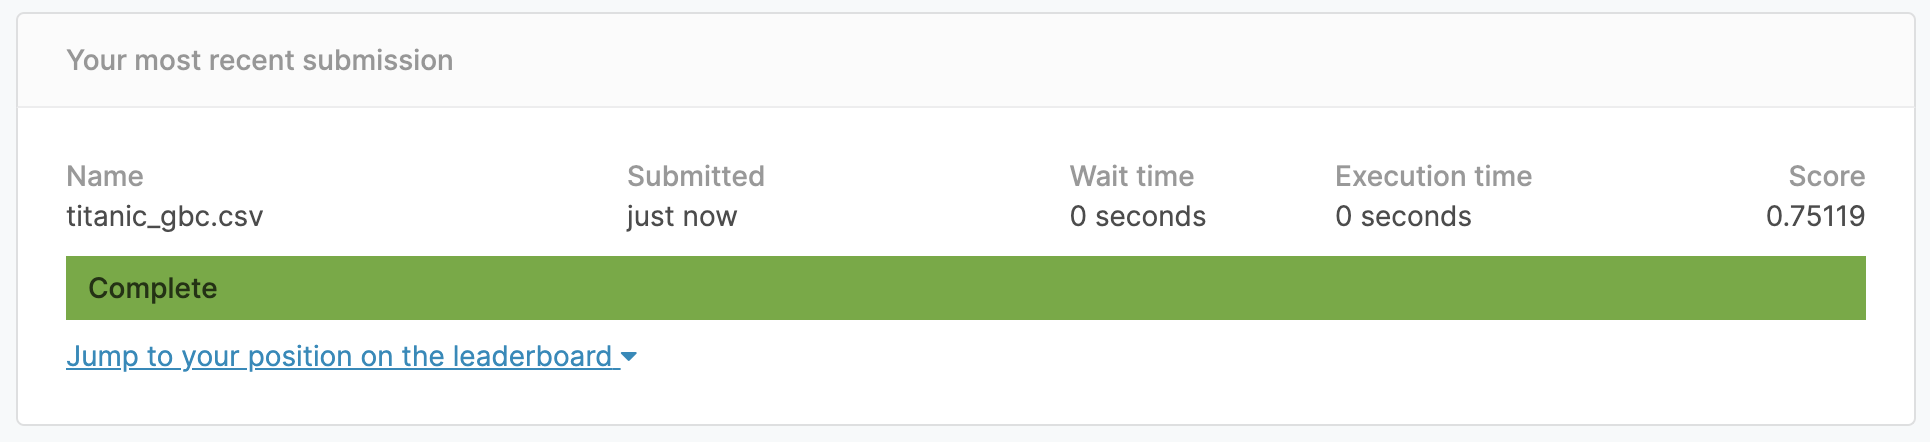

In [59]:
from IPython.display import Image
Image("kaggle.png")

Não foi uma das melhores... mas para uma primeira vez, tá ótimo!